In [1]:
from Bandits import Bandits, UCB1, EpsGreedy, Thompson
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Run algorithm on bandits T times
def estimate(bandits, T:int):
    s = [0]
    for t in range(T):
        bandits.pull_lever()
        s.append(bandits.income/(t+1))
    return s

# Compute "money" loss, regret
def regret(xs:list, ys:list):
    xs = np.array(xs)
    ys = np.array(ys)
    return np.sum(np.abs(xs-ys))

In [3]:
#Binomial distributions:
###############################################################################
probs = [0.2, 0.4, 0.6, 0.8]
optimal = np.max(probs)
def receive_pull(i:int) -> int:
    return np.random.binomial(1,probs[i], 1).item()

In [4]:
banditsUCB = UCB1(4, receive_pull)
banditsEps = EpsGreedy(4, receive_pull, 0.01)
tries = 50000
window = tries//100


s_ucb = estimate(banditsUCB, tries)[window:]
s_eps = estimate(banditsEps, tries)[window:]
st = [optimal]*(tries+1-window)
xs = list(range(tries+1))[window:]

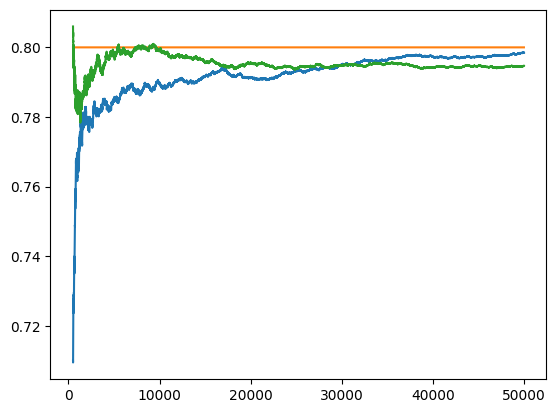

In [5]:
plt.plot(xs, s_ucb)
plt.plot(xs, st)
plt.plot(xs, s_eps)
plt.show()

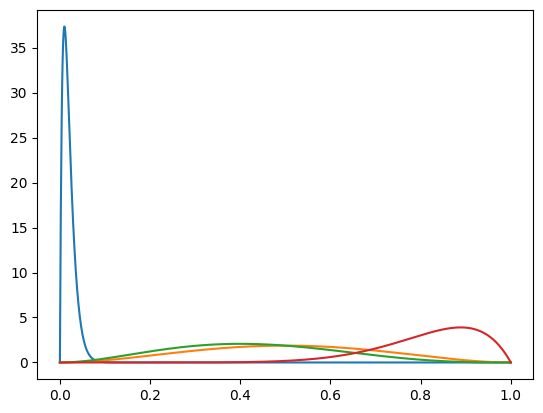

In [2]:
#Beta distributions:
#############################################################################
probs = [(2,100), (3,3), (3, 4), (9, 2)]
def sample_beta(ind:int) -> list:
    return np.random.beta(probs[ind][0], probs[ind][1], 1).item()

ts = np.linspace(0, 1, 1000)
for ind in range(4):    
    ys = beta.pdf(ts, probs[ind][0], probs[ind][1])
    plt.plot(ts, ys)
plt.show()

In [5]:
banditsUCB = UCB1(4, sample_beta)
banditsEps = EpsGreedy(4, sample_beta, 0.01)
banditsThomp = Thompson(4, sample_beta)
tries = 500000
optimal = max([u[0]/(u[0]+u[1]) for u in probs])

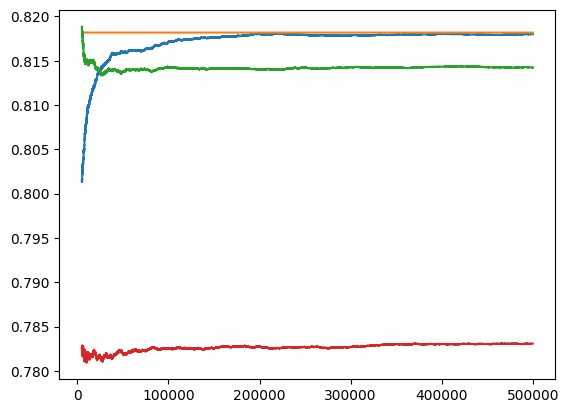

In [6]:
s_ucb = estimate(banditsUCB, tries)
s_eps = estimate(banditsEps, tries)
s_thmp = estimate(banditsThomp, tries)

window = tries//100
st = [optimal]*(tries+1-window)
xs = list(range(tries+1))[window:]
s_ucb = s_ucb[window:]
s_eps = s_eps[window:]
s_thmp = s_thmp[window:]


plt.plot(xs, s_ucb)
plt.plot(xs, st)
plt.plot(xs, s_eps)
plt.plot(xs, s_thmp)
plt.show()